In [1]:
import logging, importlib, sys, tqdm
import pandas as pd
import os, re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import histplot_count, histplot_range_count
from _metrics import display_metrics
from _utility import gl

set_logging(logging)
X_tfidf = load_pickle_object(gl.pkl_X_tfidf)
df_labels = load_pickle_object(gl.pkl_df_is_business)

2023-01-04 12:48:59,710 | INFO : Loading pickle file from: pickle\pkl_X_tfidf.pkl
2023-01-04 12:48:59,742 | INFO : Loading pickle file from: pickle\pkl_df_is_business.pkl


In [2]:
df_y = df_labels[gl.is_business]
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

In [3]:
classifier = LogisticRegression(max_iter = 1000, random_state=42)
classifier.fit(X_train, y_train)
save_pickle_object(classifier, gl.pkl_classifier_LR)



LogisticRegression(max_iter=1000, random_state=42)

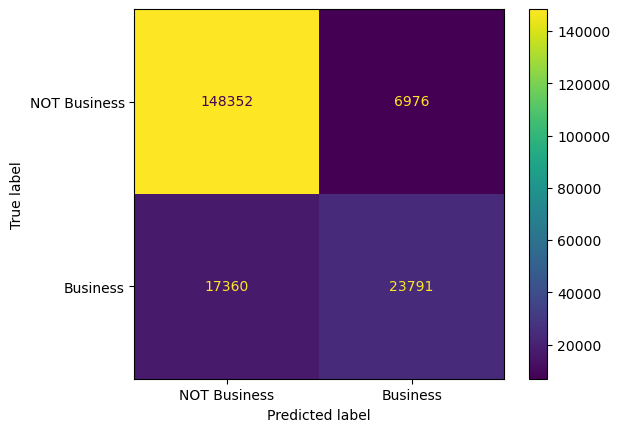

              precision    recall  f1-score   support

NOT Business       0.90      0.96      0.92    155328
    Business       0.77      0.58      0.66     41151

    accuracy                           0.88    196479
   macro avg       0.83      0.77      0.79    196479
weighted avg       0.87      0.88      0.87    196479

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.6.


In [4]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)